# **DataLoader**

This notebook prepares and visualizes a subset of the Fruits 360 dataset for image classification.  
We selected 5 fruit classes and limited the dataset to 100 images per class.  
The data is loaded using TensorFlow's `image_dataset_from_directory`, verified for structure, and visualized.

### **First Part**

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import zipfile
import os
import shutil

# Unzip
with zipfile.ZipFile("fruit_subset_100.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/fruit_subset_100")


## **Folder Structure Verification**

We check the dataset structure and number of images per class.


In [ ]:
import os

base_path = "/content/fruit_subset_100"
classes = os.listdir(base_path)
print("Detected classes:", classes)

# Count images per class
for folder in classes:
    n = len(os.listdir(os.path.join(base_path, folder)))
    print(f"{folder}: {n} images")


Detected classes: ['Apple_5', 'Cherry_1', 'Banana_1', 'Orange_1', 'Kiwi_1']
Apple_5: 100 images
Cherry_1: 100 images
Banana_1: 100 images
Orange_1: 100 images
Kiwi_1: 100 images


## **Load Dataset Using** `image_dataset_from_directory`

We split the data into training and validation (80/20), using 100×100 images and batch size of 32.


In [ ]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    base_path,
    image_size=(100, 100),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_path,
    image_size=(100, 100),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42
)

print("Classes:", train_ds.class_names)


Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.
Classes: ['Apple_5', 'Banana_1', 'Cherry_1', 'Kiwi_1', 'Orange_1']


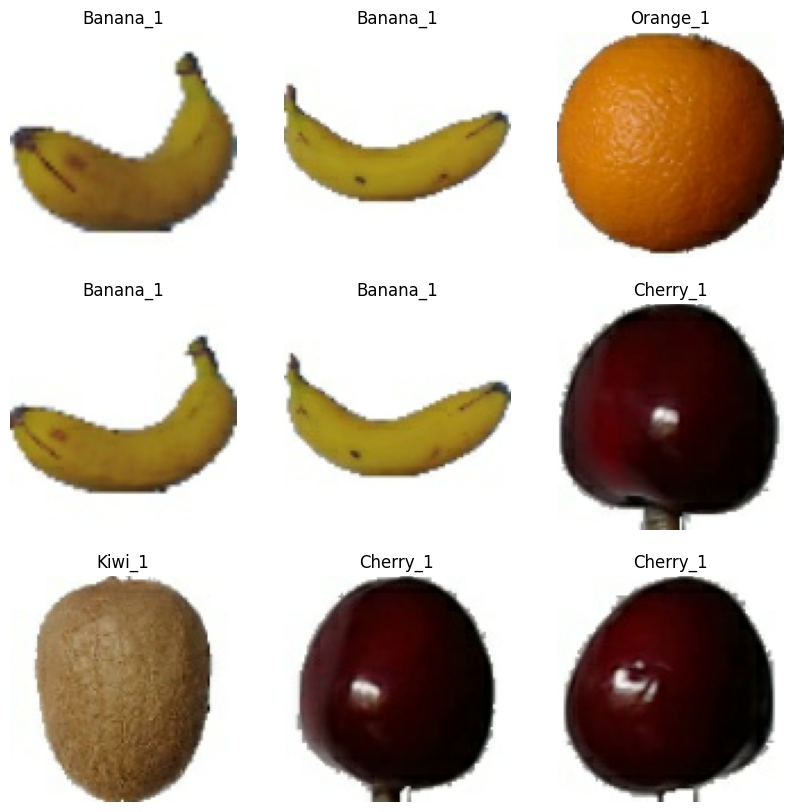

In [ ]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [ ]:
def load_dataset(path, subset, img_size=(100,100), batch_size=32):
    return tf.keras.utils.image_dataset_from_directory(
        path,
        image_size=img_size,
        batch_size=batch_size,
        validation_split=0.2,
        subset=subset,
        seed=42
    )


## **Dataset Ready**

We have successfully loaded a clean, 5-class subset of the Fruits 360 dataset.  
The structure has been verified, and we are now ready to move on to training a baseline model.
